# SVM Draft

In [79]:
import pandas as pd
import json
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Read in data
df_train = pd.read_csv('./../../data/02-clean-data/SSDB/News_Classification/train_set.csv')
df_test = pd.read_csv('./../../data/02-clean-data/SSDB/News_Classification/test_set.csv')

X_train = df_train.iloc[:,[2, 3, 7]]
y_train = df_train.iloc[:, 1]
X_test = df_test.iloc[:,[2, 3, 7]]
y_test = df_test.iloc[:, 1]

In [83]:
df_train

,Incident_ID,Media_Attention,School_Level,pct_White,pct_Black,pct_Hispanic,pct_Asian,fatalities
0,20201229WAROS,Local,3,0.533987,0.047712,0.146405,0.030719,0
1,20201216ILDUC,Local,1,0.004587,0.944954,0.045872,0.000000,1
2,20201211VATAY,Local,2,0.568233,0.130872,0.120805,0.058166,0
3,20201125KSABG,Local,1,0.149533,0.028037,0.791277,0.006231,0
4,20201113NCLIL,International,1,0.425982,0.181269,0.300604,0.000000,0
...,...,...,...,...,...,...,...,...
79,20000229MIBUF,National,1,0.270270,0.643243,0.086486,0.000000,1
80,19930514TXNII,National,3,0.590668,0.067338,0.243902,0.090138,1
81,19930203SCLEL,Regional,3,0.935484,0.055556,0.002389,0.004779,0
82,19920117SCGRG,Regional,3,0.592368,0.404603,0.001211,0.001817,0


In [82]:
# Perform balance check
balance_check = pd.DataFrame(
    [
        y_train.value_counts(sort=True).to_list(),
        y_train.value_counts(sort=True, normalize=True).to_list()
    ], 
    index=['Count', 'Percentage'], columns=['Local', 'National', 'Regional', 'International']
).T

balance_check

,Count,Percentage
Local,56.0,0.666667
National,15.0,0.178571
Regional,8.0,0.095238
International,5.0,0.059524


## SVM with Linear Kernels

In [55]:
target_names = df_train['Media_Attention'].unique().tolist()

clf = SVC(C=0.45, kernel='linear')
clf.fit(X_train, y_train)

yp_train = clf.predict(X_train)
yp_test = clf.predict(X_test)


In [56]:
# Calculate the confusion matrix and classification report for the train and test data. 
cm_train = confusion_matrix(y_train, yp_train, labels=clf.classes_)
cm_test = confusion_matrix(y_test, yp_test, labels=clf.classes_)

# Save the results in a data frame. 
clf_report_linear = classification_report(y_test, yp_test, target_names=target_names, output_dict=True)
clf_report_linear = pd.DataFrame(clf_report_linear).transpose()

clf_report_linear

/Users/joshgladwell/opt/anaconda3/envs/anly501/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joshgladwell/opt/anaconda3/envs/anly501/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joshgladwell/opt/anaconda3/envs/anly501/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

,precision,recall,f1-score,support
Local,0.000000,0.000000,0.000000,2.000000
International,0.673469,1.000000,0.804878,33.000000
Regional,0.000000,0.000000,0.000000,9.000000
National,0.000000,0.000000,0.000000,5.000000
accuracy,0.673469,0.673469,0.673469,0.673469
macro avg,0.168367,0.250000,0.201220,49.000000
weighted avg,0.453561,0.673469,0.542061,49.000000


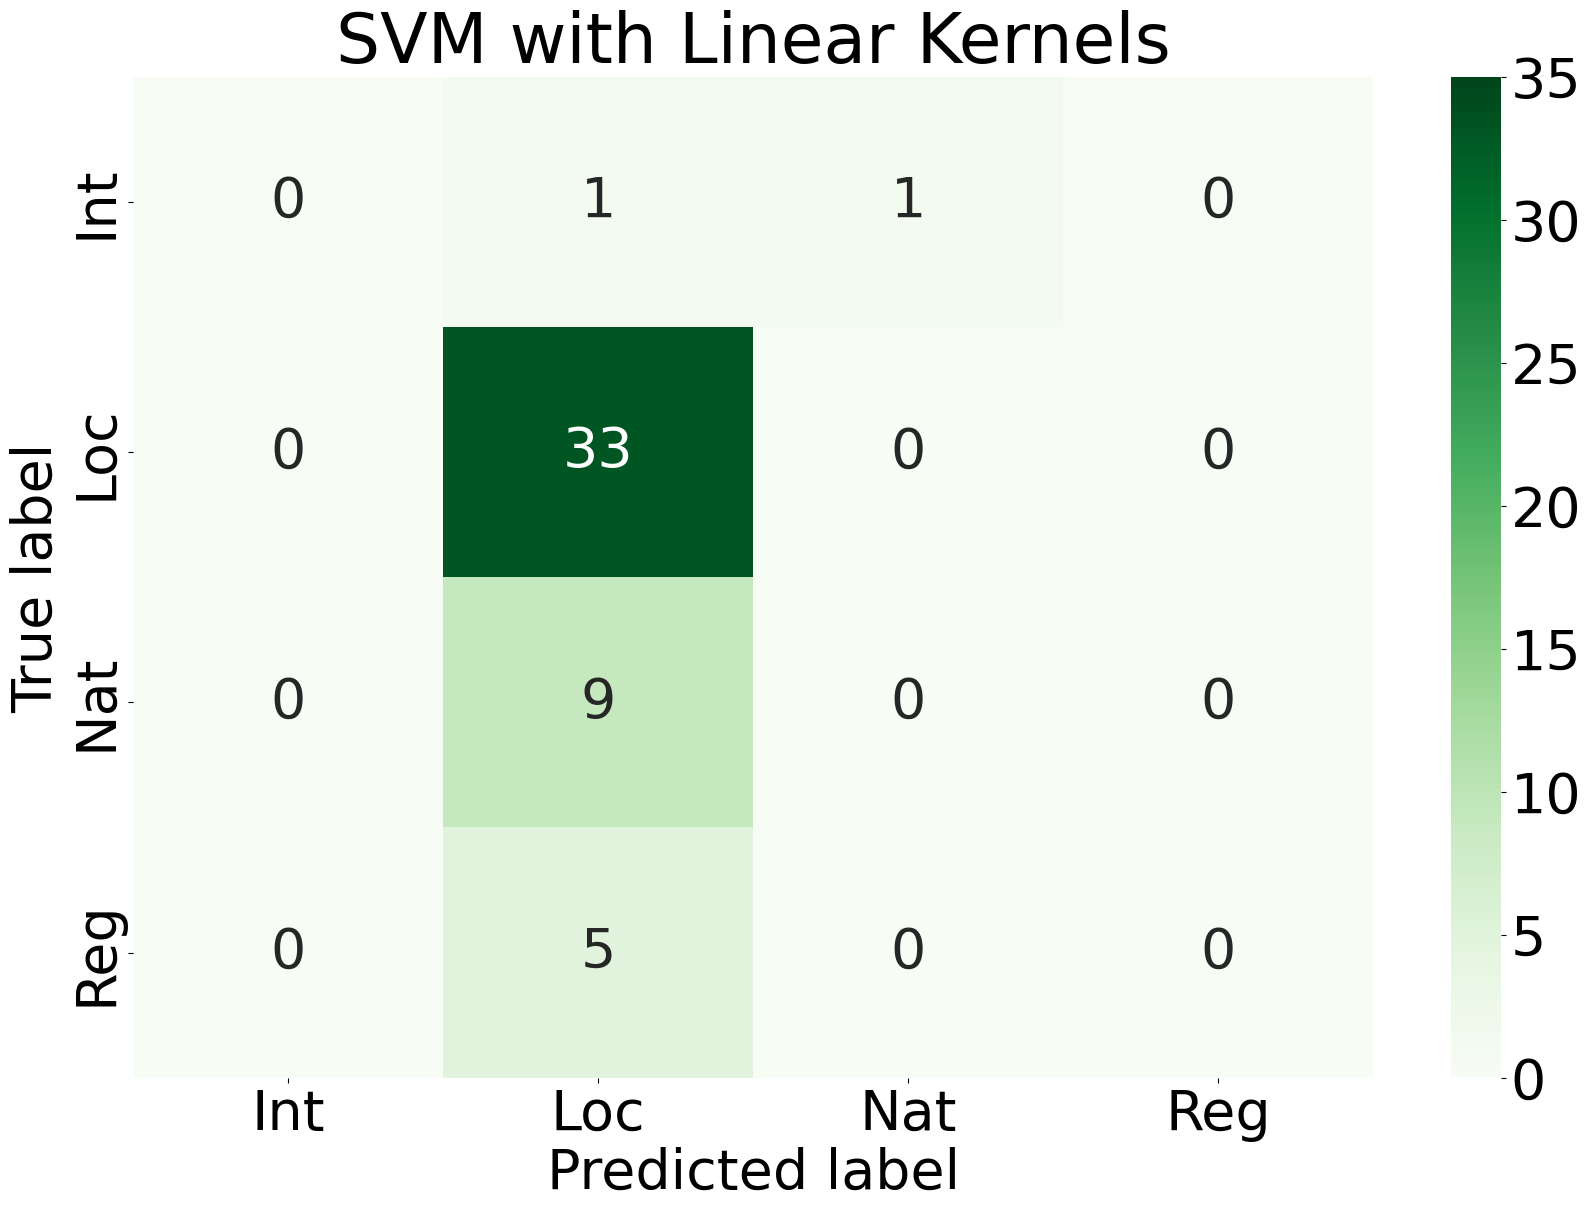

In [71]:
# Display Confusion Matrix for the test data. Remember to use the ConfusionMatrixDisplay function.


# Plot individual confusion matrices for website
plt.rcParams.update({'font.size': 40})

fig_baseline, ax_baseline = plt.subplots(figsize=(20, 13))

sns.heatmap(cm_test, annot=True, fmt='g', ax=ax_baseline, vmin=0, vmax=35, cmap='Greens')

# Specify axis titles
ax_baseline.set_title("SVM with Linear Kernels", fontdict={'fontsize': 50})

# Specify labels and ticks
ax_baseline.set_xlabel('Predicted label')
ax_baseline.set_ylabel('True label')
ax_baseline.xaxis.set_ticklabels(['Int', 'Loc', 'Nat', 'Reg'])
ax_baseline.yaxis.set_ticklabels(['Int', 'Loc', 'Nat', 'Reg'])

plt.savefig('./../../501-project-website/images/svm/cm_linear.png')

## SVM with Polynomial Kernels

In [64]:
clf = SVC(C=0.45, kernel='poly', degree=3)
clf.fit(X_train, y_train)

yp_train = clf.predict(X_train)
yp_test = clf.predict(X_test)

In [65]:
# Calculate the confusion matrix and classification report for the train and test data. 
cm_train = confusion_matrix(y_train, yp_train, labels=clf.classes_)
cm_test = confusion_matrix(y_test, yp_test, labels=clf.classes_)

# Save the results in a data frame. 
clf_report_linear = classification_report(y_test, yp_test, target_names=target_names, output_dict=True)
clf_report_linear = pd.DataFrame(clf_report_linear).transpose()

clf_report_linear

/Users/joshgladwell/opt/anaconda3/envs/anly501/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joshgladwell/opt/anaconda3/envs/anly501/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joshgladwell/opt/anaconda3/envs/anly501/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

,precision,recall,f1-score,support
Local,0.000000,0.000000,0.000000,2.000000
International,0.702128,1.000000,0.825000,33.000000
Regional,0.500000,0.111111,0.181818,9.000000
National,0.000000,0.000000,0.000000,5.000000
accuracy,0.693878,0.693878,0.693878,0.693878
macro avg,0.300532,0.277778,0.251705,49.000000
weighted avg,0.564698,0.693878,0.589007,49.000000


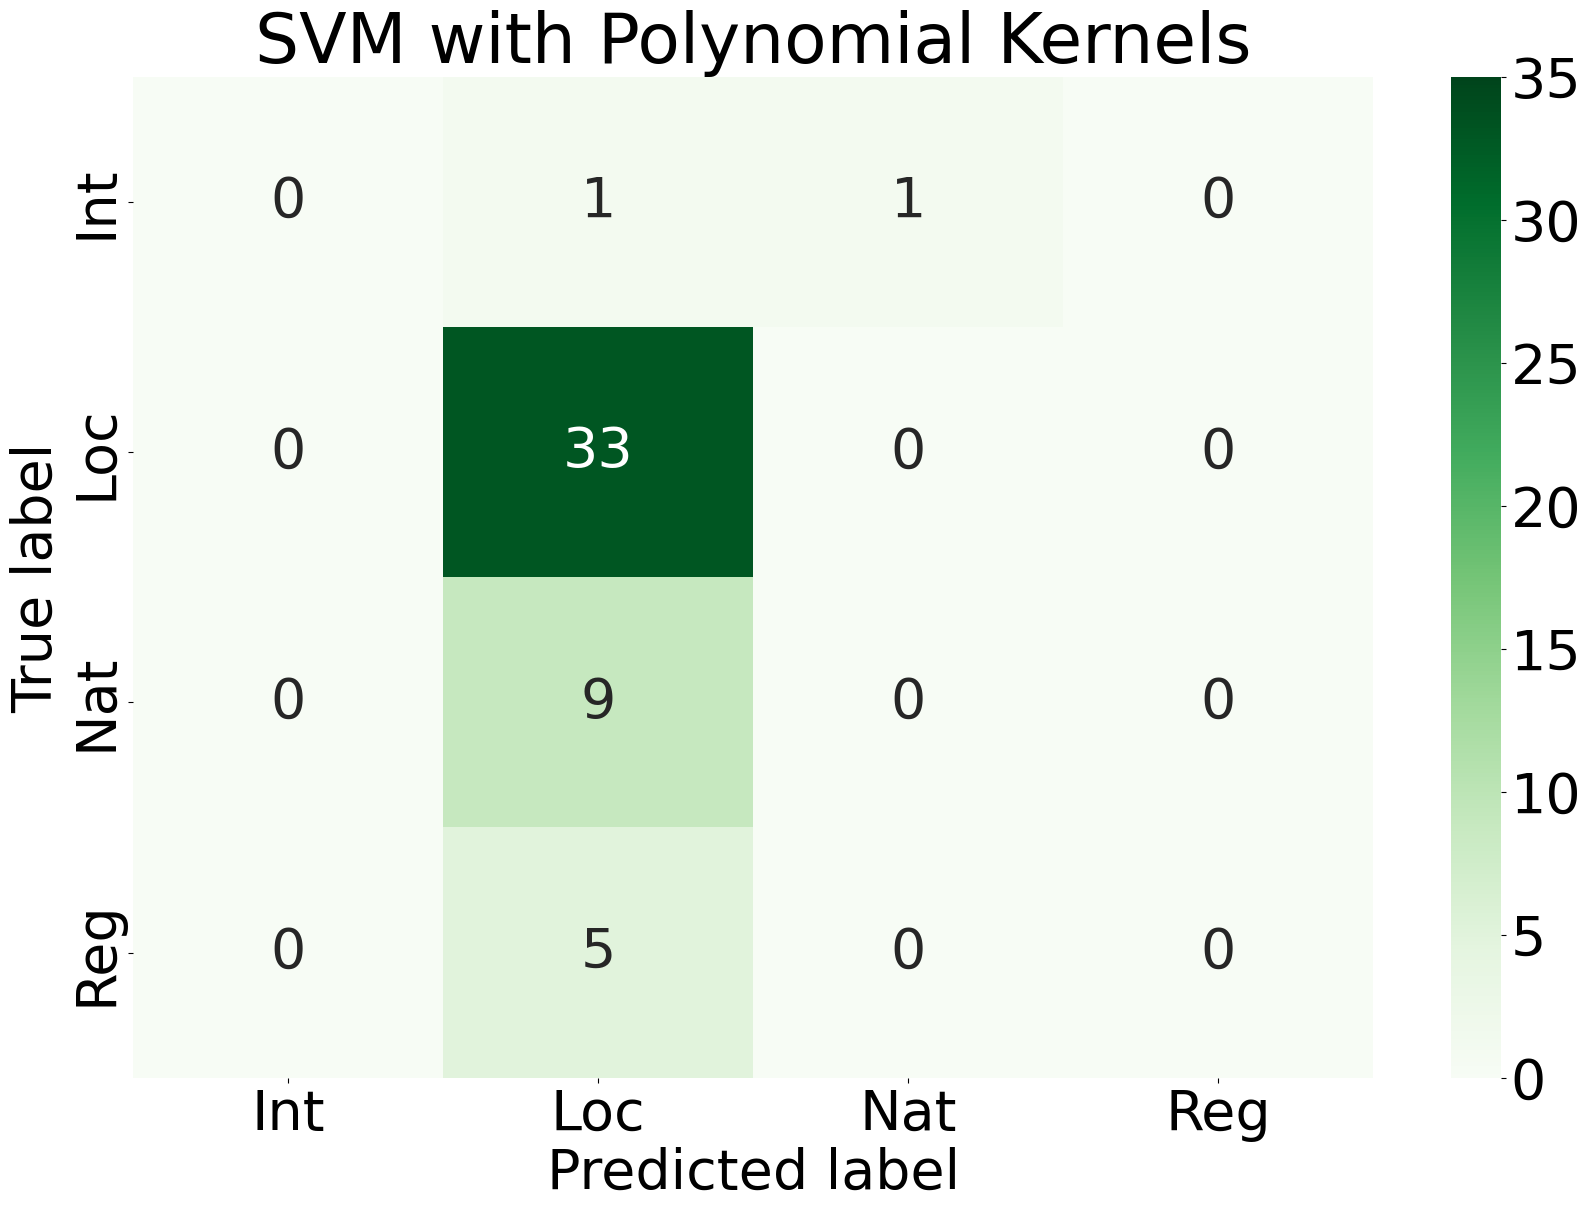

In [72]:
# Display Confusion Matrix for the test data. Remember to use the ConfusionMatrixDisplay function.


# Plot individual confusion matrices for website
plt.rcParams.update({'font.size': 40})

fig_baseline, ax_baseline = plt.subplots(figsize=(20, 13))

sns.heatmap(cm_test, annot=True, fmt='g', ax=ax_baseline, vmin=0, vmax=35, cmap='Greens')

# Specify axis titles
ax_baseline.set_title("SVM with Polynomial Kernels", fontdict={'fontsize': 50})

# Specify labels and ticks
ax_baseline.set_xlabel('Predicted label')
ax_baseline.set_ylabel('True label')
ax_baseline.xaxis.set_ticklabels(['Int', 'Loc', 'Nat', 'Reg'])
ax_baseline.yaxis.set_ticklabels(['Int', 'Loc', 'Nat', 'Reg'])

plt.savefig('./../../501-project-website/images/svm/cm_poly.png')

## SVM with RBF Kernels

In [67]:
clf = SVC(C=0.45, kernel='rbf')
clf.fit(X_train, y_train)

yp_train = clf.predict(X_train)
yp_test = clf.predict(X_test)

In [68]:
# Calculate the confusion matrix and classification report for the train and test data. 
cm_train = confusion_matrix(y_train, yp_train, labels=clf.classes_)
cm_test = confusion_matrix(y_test, yp_test, labels=clf.classes_)

# Save the results in a data frame. 
clf_report_linear = classification_report(y_test, yp_test, target_names=target_names, output_dict=True)
clf_report_linear = pd.DataFrame(clf_report_linear).transpose()

clf_report_linear

/Users/joshgladwell/opt/anaconda3/envs/anly501/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joshgladwell/opt/anaconda3/envs/anly501/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joshgladwell/opt/anaconda3/envs/anly501/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

,precision,recall,f1-score,support
Local,0.000000,0.000000,0.000000,2.000000
International,0.687500,1.000000,0.814815,33.000000
Regional,0.000000,0.000000,0.000000,9.000000
National,0.000000,0.000000,0.000000,5.000000
accuracy,0.673469,0.673469,0.673469,0.673469
macro avg,0.171875,0.250000,0.203704,49.000000
weighted avg,0.463010,0.673469,0.548753,49.000000


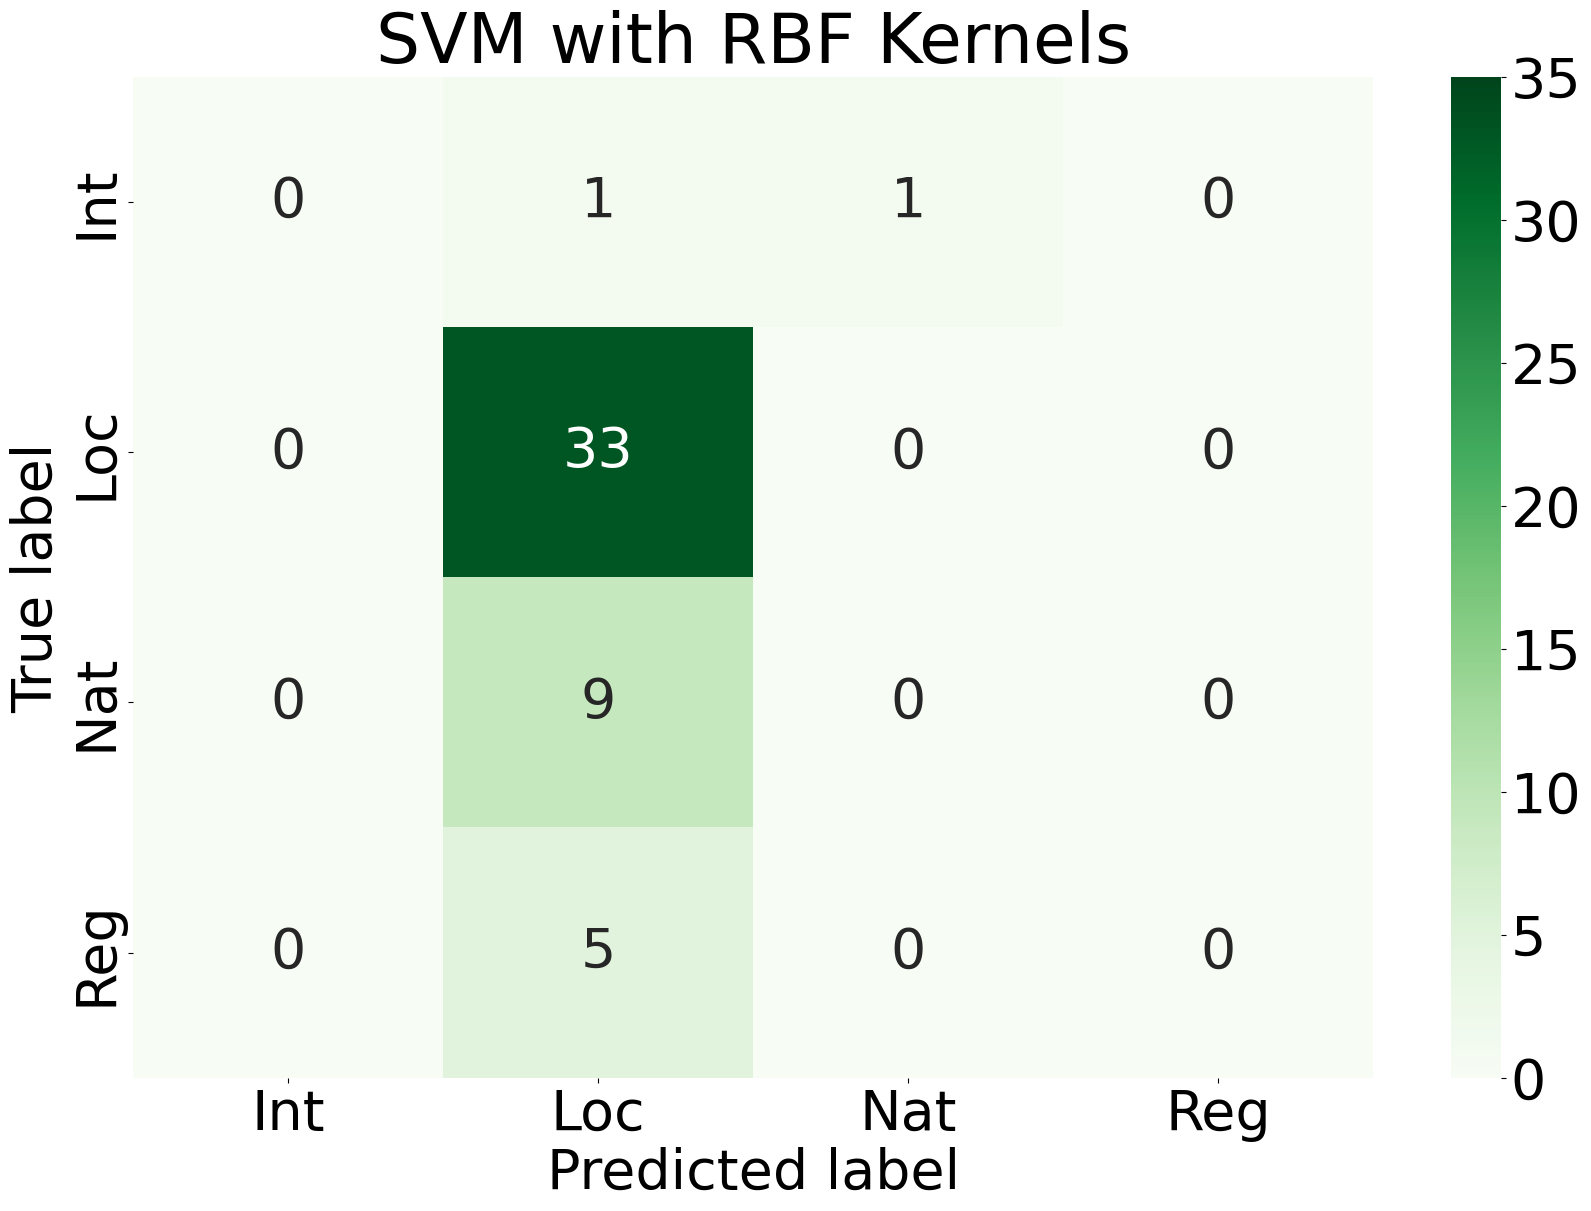

In [73]:


# Plot individual confusion matrices for website
plt.rcParams.update({'font.size': 40})

fig_baseline, ax_baseline = plt.subplots(figsize=(20, 13))

sns.heatmap(cm_test, annot=True, fmt='g', ax=ax_baseline, vmin=0, vmax=35, cmap='Greens')

# Specify axis titles
ax_baseline.set_title("SVM with RBF Kernels", fontdict={'fontsize': 50})

# Specify labels and ticks
ax_baseline.set_xlabel('Predicted label')
ax_baseline.set_ylabel('True label')
ax_baseline.xaxis.set_ticklabels(['Int', 'Loc', 'Nat', 'Reg'])
ax_baseline.yaxis.set_ticklabels(['Int', 'Loc', 'Nat', 'Reg'])

plt.savefig('./../../501-project-website/images/svm/cm_rbf.png')

## SVM with Sigmoid Kernels

In [38]:
clf = SVC(C=0.45, kernel='sigmoid')
clf.fit(X_train, y_train)

yp_train = clf.predict(X_train)
yp_test = clf.predict(X_test)

In [39]:
# Calculate the confusion matrix and classification report for the train and test data. 
cm_train = confusion_matrix(y_train, yp_train, labels=clf.classes_)
cm_test = confusion_matrix(y_test, yp_test, labels=clf.classes_)

# Save the results in a data frame. 
clf_report_linear = classification_report(y_test, yp_test, target_names=target_names, output_dict=True)
clf_report_linear = pd.DataFrame(clf_report_linear).transpose()

clf_report_linear

/Users/joshgladwell/opt/anaconda3/envs/anly501/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joshgladwell/opt/anaconda3/envs/anly501/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joshgladwell/opt/anaconda3/envs/anly501/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

,precision,recall,f1-score,support
Local,0.000000,0.000000,0.000000,2.000000
International,0.673469,1.000000,0.804878,33.000000
Regional,0.000000,0.000000,0.000000,9.000000
National,0.000000,0.000000,0.000000,5.000000
accuracy,0.673469,0.673469,0.673469,0.673469
macro avg,0.168367,0.250000,0.201220,49.000000
weighted avg,0.453561,0.673469,0.542061,49.000000


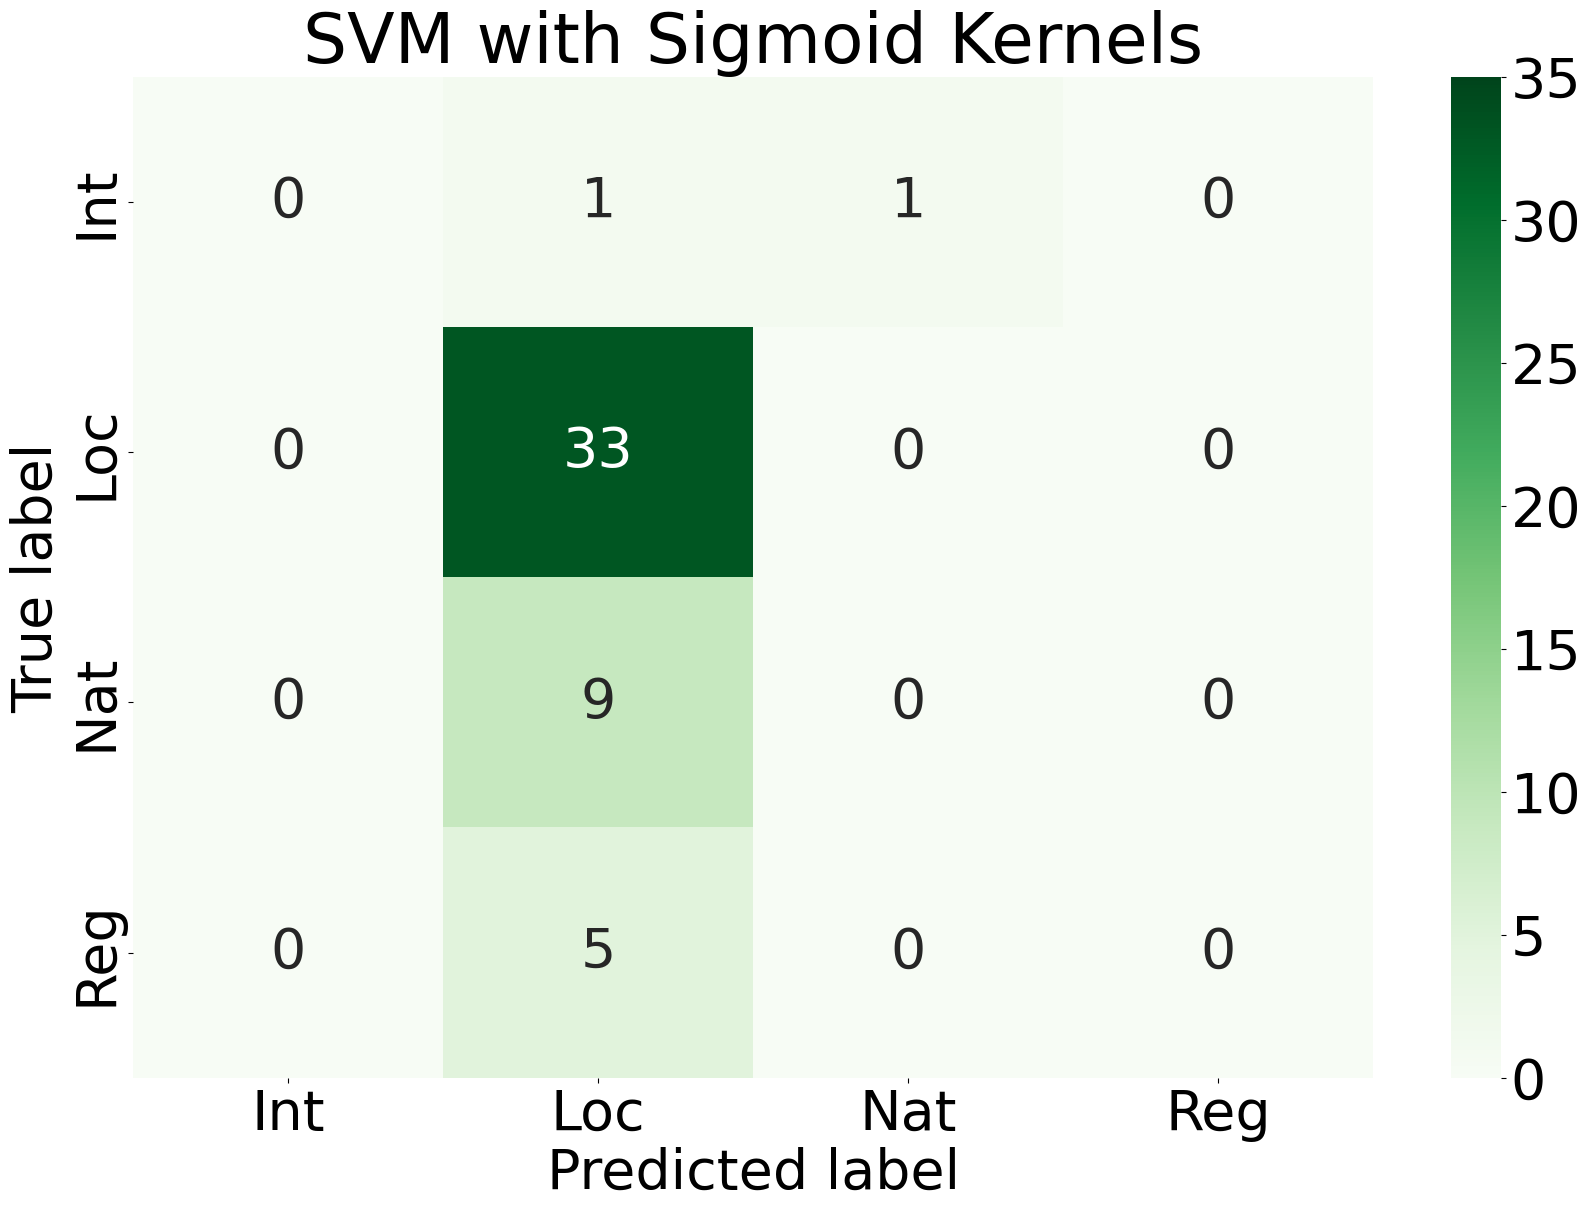

In [74]:


# Plot individual confusion matrices for website
plt.rcParams.update({'font.size': 40})

fig_baseline, ax_baseline = plt.subplots(figsize=(20, 13))

sns.heatmap(cm_test, annot=True, fmt='g', ax=ax_baseline, vmin=0, vmax=35, cmap='Greens')

# Specify axis titles
ax_baseline.set_title("SVM with Sigmoid Kernels", fontdict={'fontsize': 50})

# Specify labels and ticks
ax_baseline.set_xlabel('Predicted label')
ax_baseline.set_ylabel('True label')
ax_baseline.xaxis.set_ticklabels(['Int', 'Loc', 'Nat', 'Reg'])
ax_baseline.yaxis.set_ticklabels(['Int', 'Loc', 'Nat', 'Reg'])

plt.savefig('./../../501-project-website/images/svm/cm_sigmoid.png')